In [1]:
#Import necessary packages
import pandas as pd #load data, evaluate model, dummy variables
import numpy as np #impute nulls
import matplotlib.pyplot as plt #plot visualizations

import seaborn as sns #plot visualizations
sns.set_theme()

import sklearn as sk 
from sklearn.preprocessing import StandardScaler #normalize data using z-score
from sklearn.cluster import KMeans #create k-means object
from sklearn.metrics import silhouette_score #calculate silhouette score (k optimal value)

import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data, keep values of "NONE"
df = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/D212_medical_raw.csv', keep_default_na=False)

In [3]:
#View first 3 rows in full table for overview
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.40342,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.99812,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.19246,2,4,4,4,3,4,3,3


In [4]:
#Get summary of full data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#Get summary of my two variables
clusterdata = df[['Income', 'TotalCharge']]
clusterdata.describe().round(2)

,Income,TotalCharge
count,10000.00,10000.00
mean,40490.50,5312.17
std,28521.15,2180.39
min,154.08,1938.31
25%,19598.78,3179.37
50%,33768.42,5213.95
75%,54296.40,7459.70
max,207249.10,9180.73


In [2]:
#Assess for duplicates
clusterdata.duplicated().value_counts()

NameError: name 'df' is not defined

In [7]:
#Assess for nulls
clusterdata.isnull().sum()

Income         0
TotalCharge    0
dtype: int64

<Axes: >

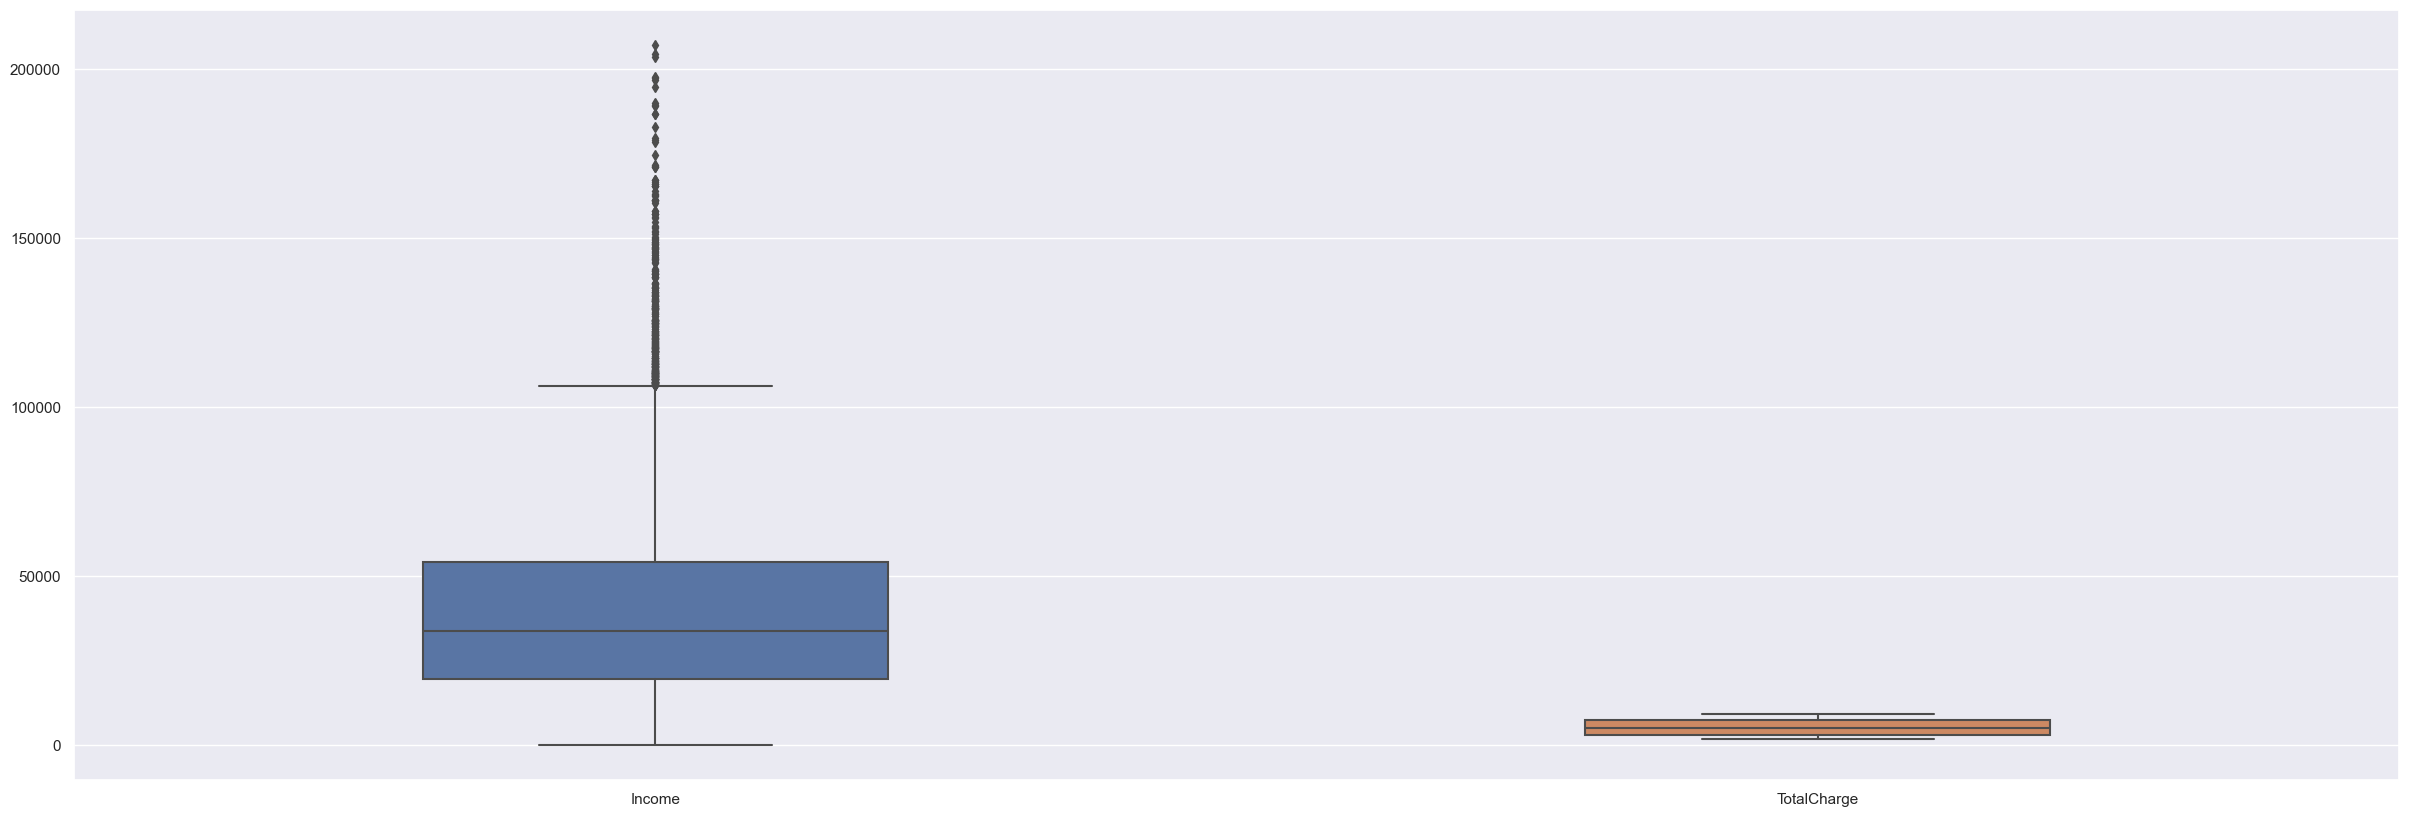

In [8]:
# Create seaborn boxplots of my variables
plt.subplots(figsize=(30, 10))
sns.boxplot(data=clusterdata, width=0.4)

In [9]:
income_query = clusterdata.query('Income > 110000')
income_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 30 to 9955
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       274 non-null    float64
 1   TotalCharge  274 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


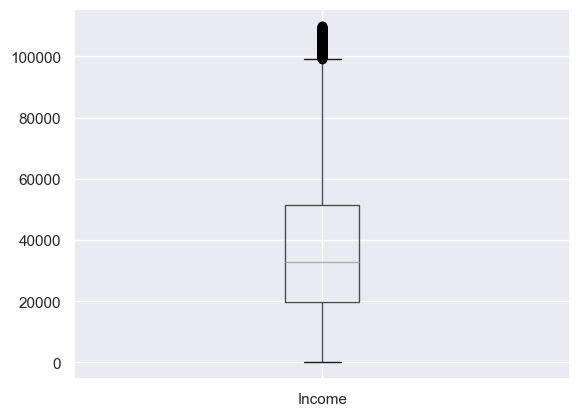

In [10]:
# Replace outliers with nulls
clusterdata['Income']=np.where(clusterdata['Income']>110000,np.nan,clusterdata['Income'])

# Impute nulls with median
clusterdata['Income'].fillna(clusterdata['Income'].median(), inplace=True)

# Confirm values are below 110000
income_bp=clusterdata.boxplot(column=['Income'])

In [11]:
#Normalize my two variables
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Income', 'TotalCharge']])

In [12]:
scaled_df = pd.DataFrame(scaled_df, columns = ['Income', 'TotalCharge'])
scaled_df

,Income,TotalCharge
0,1.615914,-0.727185
1,0.221443,-0.513228
2,-0.915870,-1.319983
3,-0.026263,-1.460517
4,-1.377325,-1.467285
...,...,...
9995,0.192047,0.705765
9996,-0.894380,1.114312
9997,0.891569,1.359597
9998,-0.378271,1.069727


In [13]:
#Confirm data is scaled, mean = 0 and std = 1
scaled_df.describe().round(2)

,Income,TotalCharge
count,10000.00,10000.00
mean,0.00,0.00
std,1.00,1.00
min,-1.41,-1.55
25%,-0.73,-0.98
50%,-0.24,-0.05
75%,0.48,0.98
max,5.85,1.77


In [14]:
#Save output to csv file
scaled_df.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D212_MV_medical_clean.csv')

In [15]:
#Build k-means model
k_model = KMeans(n_clusters = 3, n_init = 25, random_state = 300)

k_model.fit(scaled_df)

KMeans(n_clusters=3, n_init=25, random_state=300)

In [16]:
#Evaluate the model
evaluate = pd.Series(k_model.labels_).value_counts()
evaluate

1    4240
0    4219
2    1541
Name: count, dtype: int64

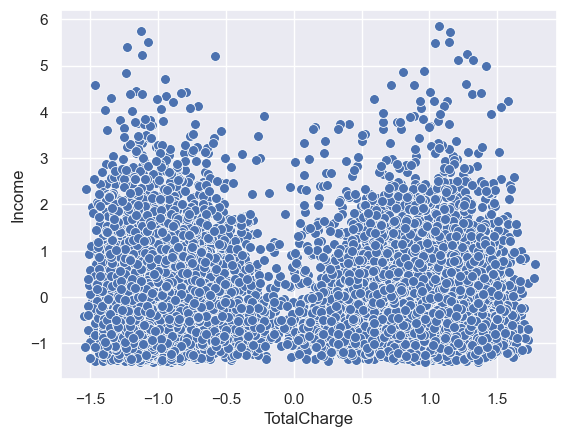

In [17]:
#Visualize the data
ax = sns.scatterplot(data = scaled_df,
                     x = 'TotalCharge',
                     y = 'Income',
                     s = 50)

In [18]:
#Create centroids
centroid = pd.DataFrame(k_model.cluster_centers_,
                        columns = ['Income', 'TotalCharge'])
centroid

,Income,TotalCharge
0,-0.336102,-0.948244
1,-0.323370,0.967796
2,1.808531,-0.068533


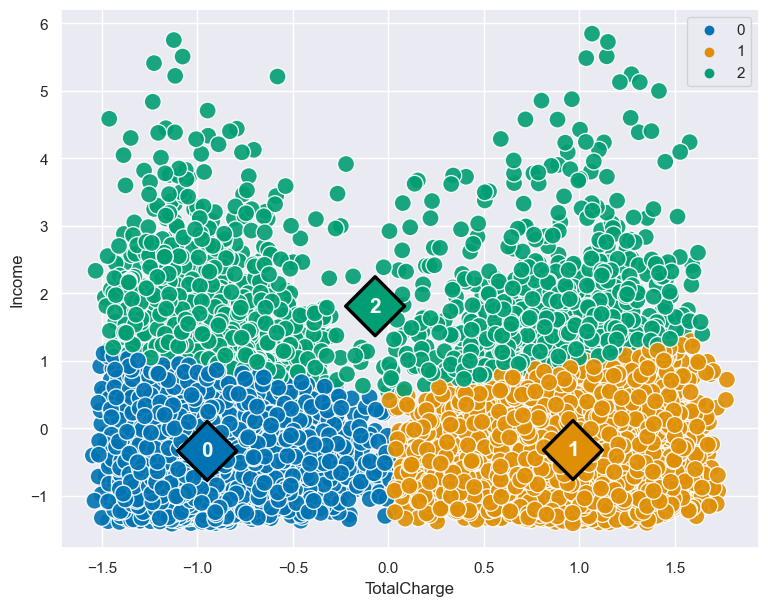

In [19]:
#Visualize centroids and clusters
plt.figure(figsize=(9, 7))

ax = sns.scatterplot(data = scaled_df,
                     x = 'TotalCharge',
                     y = 'Income',
                     hue = k_model.labels_,
                     palette = 'colorblind',
                     alpha = 0.9,
                     s = 150,
                     legend = True)

ax = sns.scatterplot(data = centroid,
                     x = 'TotalCharge',
                     y = 'Income',
                     hue = centroid.index,
                     palette = 'colorblind',
                     s = 900,
                     marker = 'D',
                     edgecolor = 'black',
                     legend = False)

for i in range(len(centroid)):
                plt.text(x = centroid.TotalCharge[i],
                         y = centroid.Income[i],
                         s = i,
                         horizontalalignment = 'center',
                         verticalalignment = 'center',
                         size = 15,
                         weight = 'bold',
                         color = 'white')

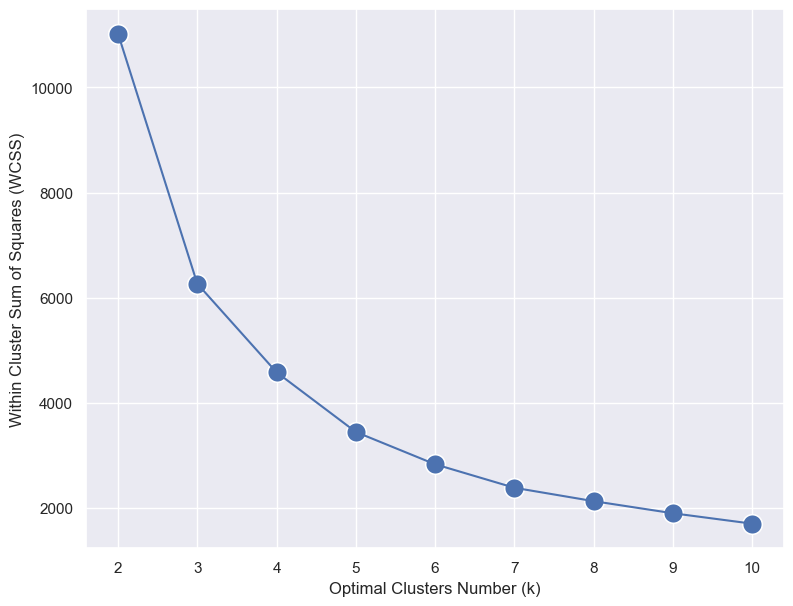

In [20]:
#Use WCSS plot to find k optimal value
wcss = []
for k in range (2, 11):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 300)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(9, 7))
ax = sns.lineplot(y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s, x = wcss_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

In [21]:
# WCSS plot shows k optimal value is ~ 3-5
# Next, calculate silhouette score
silhouette_sc = silhouette_score(scaled_df, k_model.labels_)
silhouette_sc

0.5220247220647468

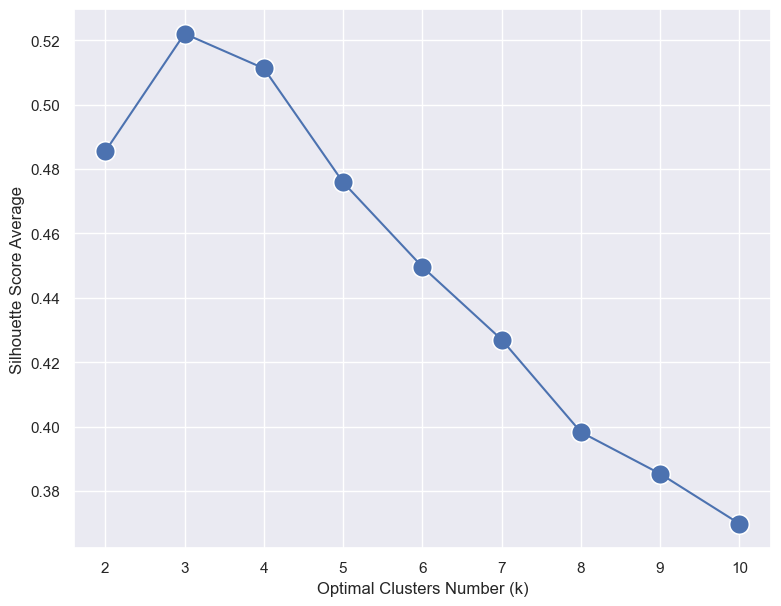

In [22]:
#Silhouette score is closer to 1, meaning data points are similar
#Next, plot silhouette plot to find k optimal value
silhouette = []
for k in range (2, 11):
    model = KMeans(n_clusters = k, n_init = 25, random_state = 300)
    model.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, model.labels_))

silhouette_s = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(9, 7))
ax = sns.lineplot(y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel = 'Silhouette Score Average')

In [23]:
# Silhouette plot shows k optimal value is 3
# Since elbow plot is less clear, I will go with silhouette plot k optimal value for my final model
# Since I used k = 3 for my original model, another model is not needed
# Next, I will label the clusters
df['Cluster'] = k_model.labels_.tolist()
df.head(12)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Cluster
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,17939.403420,3,3,2,2,4,3,3,4,2
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,17612.998120,3,4,3,4,4,4,3,3,0
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,17505.192460,2,4,4,4,3,4,3,3,0
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,12993.437350,3,5,5,3,4,5,5,5,0
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,3716.525786,2,1,3,3,5,3,4,3,0
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,...,12742.589910,4,5,4,4,3,5,4,6,2
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,...,16815.513600,4,3,3,2,3,4,5,5,0
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,...,6930.572138,1,2,2,5,4,2,4,2,0
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,...,8363.187290,3,3,2,3,3,3,4,2,0
9,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,...,26225.989910,5,5,5,3,4,2,3,2,0


In [24]:
#Create dummy variables for Gender
patients = pd.get_dummies(df, columns = ['Gender'])
patients.head(12)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Item3,Item4,Item5,Item6,Item7,Item8,Cluster,Gender_Female,Gender_Male,Gender_Nonbinary
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,2,2,4,3,3,4,2,False,True,False
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,3,4,4,4,3,3,0,True,False,False
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,4,4,3,4,3,3,0,True,False,False
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,5,3,4,5,5,5,0,False,True,False
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,3,3,5,3,4,3,0,True,False,False
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,...,4,4,3,5,4,6,2,False,True,False
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,...,3,2,3,4,5,5,0,False,True,False
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,...,2,5,4,2,4,2,0,True,False,False
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,...,2,3,3,3,4,2,0,False,True,False
9,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,...,5,3,4,2,3,2,0,True,False,False


In [25]:
#Analysis of all patients
patients.agg({
    'Gender_Female' : 'mean',
    'Gender_Male' : 'mean',
    'Age' : 'median',
    'Income' : 'median',
    'TotalCharge' : 'median'}).round(2)

Gender_Female        0.50
Gender_Male          0.48
Age                 53.00
Income           33768.42
TotalCharge       5213.95
dtype: float64

In [26]:
#Analysis of all patients by cluster
patients.groupby('Cluster').agg({
    'Gender_Female' : 'mean',
    'Gender_Male' : 'mean',
    'Age' : 'median',
    'Income' : 'median',
    'TotalCharge' : 'median'})

,Gender_Female,Gender_Male,Age,Income,TotalCharge
Cluster,,,,,
0,0.509836,0.469780,54.0,28691.930,3171.543626
1,0.498349,0.479717,53.0,29177.995,7506.511500
2,0.489293,0.487995,53.0,85141.240,4487.299236
